In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,f1_score
import graphviz
from graphviz import Source
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
glass_ind = pd.read_csv('glass-classification.csv')
glass_ind

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
#Prewidywanie "Type of glass"

In [3]:
print(glass_ind["Type of glass"].unique())

[1 2 3 5 6 7]


In [4]:
#Do przewidywania "Type of glass" korzystamy z Klasyfikatora

In [6]:
glass_ind.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
#Poprawnosc odczytania danych

In [8]:
glass_ind[glass_ind['Type of glass']==1]

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...
65,66,1.52099,13.69,3.59,1.12,71.96,0.09,9.40,0.0,0.00,1
66,67,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.0,0.17,1
67,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
68,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1


In [9]:
glass_ind.isna().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [10]:
#Widzimy że niema kolumn z brakiem danych

In [11]:
#Zadamy atrybuty ot ktorych zalezy wyniik

In [17]:
X = glass_ind.loc[:,['RI', 'Na', 'Mg','Al']]
y = glass_ind.loc[:,'Type of glass']
X
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type of glass, Length: 214, dtype: int64

In [18]:
# Generacja drzewa

In [19]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

In [20]:
#Rysowanie drzewa

[Text(0.38773148148148145, 0.9615384615384616, 'X[2] <= 2.695\ngini = 0.737\nsamples = 214\nvalue = [70, 76, 17, 13, 9, 29]'),
 Text(0.12962962962962962, 0.8846153846153846, 'X[1] <= 13.785\ngini = 0.706\nsamples = 61\nvalue = [0, 13, 0, 13, 9, 26]'),
 Text(0.07407407407407407, 0.8076923076923077, 'X[0] <= 1.524\ngini = 0.538\nsamples = 24\nvalue = [0, 11, 0, 12, 0, 1]'),
 Text(0.05555555555555555, 0.7307692307692307, 'X[1] <= 13.495\ngini = 0.443\nsamples = 17\nvalue = [0, 4, 0, 12, 0, 1]'),
 Text(0.037037037037037035, 0.6538461538461539, 'X[3] <= 1.295\ngini = 0.142\nsamples = 13\nvalue = [0, 0, 0, 12, 0, 1]'),
 Text(0.018518518518518517, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1]'),
 Text(0.05555555555555555, 0.5769230769230769, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0, 0]'),
 Text(0.07407407407407407, 0.6538461538461539, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0, 0, 0, 0]'),
 Text(0.09259259259259259, 0.7307692307692307, 'gini = 0.0\nsamples

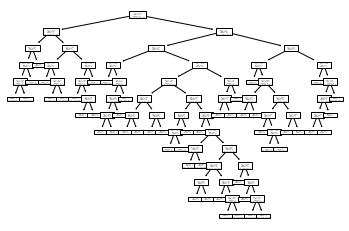

In [21]:
tree.plot_tree(clf)

In [27]:
data = tree.export_graphviz(clf,filled=True, feature_names=['RI', 'Na', 'Mg','Al'], class_names = ['1', '2', '3', '5','6', '7'])

In [25]:
#Kolorowanie drzewa 

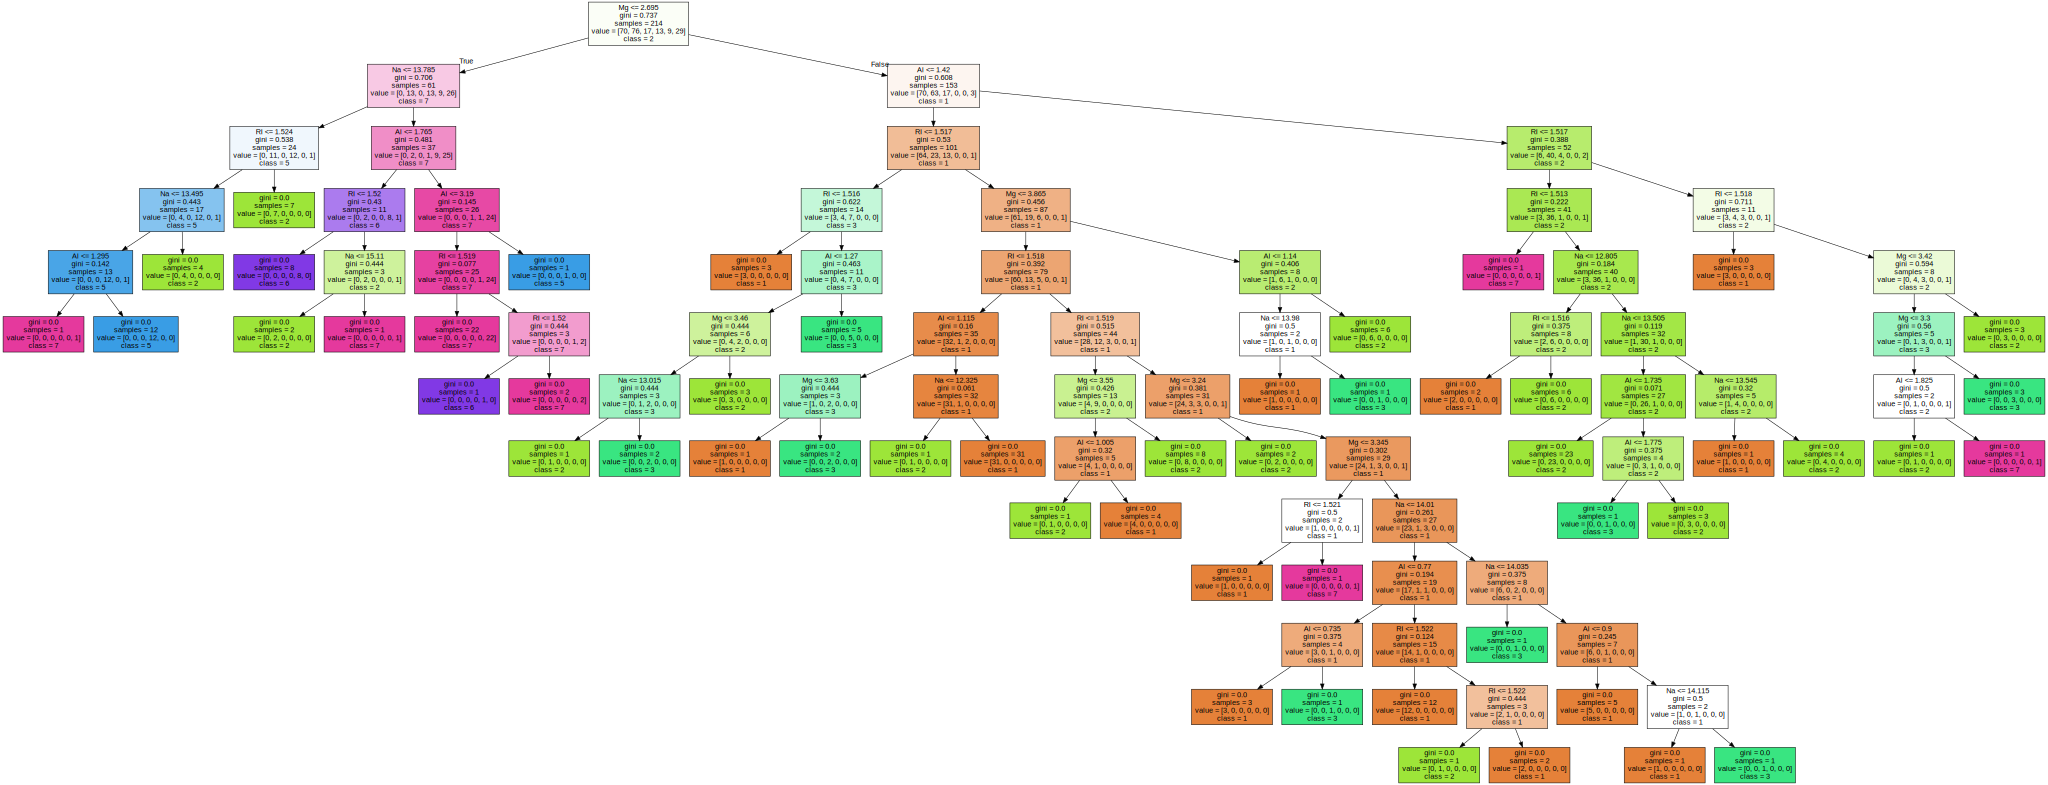

In [28]:
graph=graphviz.Source(data)
graph


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train

,RI,Na,Mg,Al
43,1.52210,13.73,3.84,0.72
115,1.51846,13.41,3.89,1.33
145,1.51839,12.85,3.67,1.24
111,1.52739,11.02,0.00,0.75
95,1.51860,13.36,3.43,1.43
...,...,...,...,...
166,1.52151,11.03,1.71,1.56
116,1.51829,13.24,3.90,1.41
193,1.51719,14.75,0.00,2.00
45,1.51900,13.49,3.48,1.35


In [31]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [32]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [34]:
params = dict()
params['n_estimators'] = [200, 215]
params['max_depth'] = [10, 15, 20, 25,30, 35, 40, 45, 50]

In [35]:
search = GridSearchCV(rf, params)
results = search.fit(X_train, y_train)
best = results.best_estimator_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [36]:
best

RandomForestClassifier(max_depth=15, n_estimators=200)

In [37]:
best.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=200)

In [38]:
X = scaler.fit_transform(X)
X

array([[0.43283582, 0.43759398, 1.        , 0.25233645],
       [0.28358209, 0.47518797, 0.80178174, 0.33333333],
       [0.22080773, 0.42105263, 0.79064588, 0.3894081 ],
       [0.285777  , 0.37293233, 0.82182628, 0.31152648],
       [0.27524144, 0.38195489, 0.80623608, 0.29595016],
       [0.21115013, 0.30977444, 0.80400891, 0.41433022],
       [0.27568042, 0.38646617, 0.80178174, 0.26479751],
       [0.28138718, 0.36390977, 0.80400891, 0.23676012],
       [0.35250219, 0.49774436, 0.79732739, 0.3364486 ],
       [0.2809482 , 0.34135338, 0.80178174, 0.33333333],
       [0.20017559, 0.29924812, 0.77060134, 0.39563863],
       [0.28446005, 0.3112782 , 0.81514477, 0.30529595],
       [0.20807726, 0.32330827, 0.76391982, 0.34579439],
       [0.27787533, 0.32030075, 0.79287305, 0.30529595],
       [0.28446005, 0.28270677, 0.79955457, 0.31775701],
       [0.28358209, 0.31278195, 0.78841871, 0.29283489],
       [0.29367867, 0.29323308, 0.81737194, 0.27102804],
       [0.47453907, 0.54586466,

In [39]:
glass_ind['Type of glass  prediction'] = best.predict(X)

In [40]:
glass_ind

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type of glass prediction
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,2
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,5
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,5
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,5
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,5


In [ ]:
#Jesli byloby wybrano wiecej parametrow dla dzrewa deczyjnego wtedy wynik bylby liepszy

In [41]:
glass_ind.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type of glass prediction
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,2
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1


In [42]:
X = glass_ind.loc[:,['RI',	'Na','Mg','Al',	'Si',	'K','Ca',	'Ba','Fe']]
y = glass_ind.loc[:,'Type of glass']
X
y


0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type of glass, Length: 214, dtype: int64

In [43]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

[Text(0.744017454954955, 0.9615384615384616, 'X[7] <= 0.335\ngini = 0.737\nsamples = 214\nvalue = [70, 76, 17, 13, 9, 29]'),
 Text(0.5601069819819819, 0.8846153846153846, 'X[3] <= 1.42\ngini = 0.681\nsamples = 185\nvalue = [69, 75, 17, 12, 9, 3]'),
 Text(0.3837274774774775, 0.8076923076923077, 'X[6] <= 10.48\ngini = 0.6\nsamples = 113\nvalue = [63, 31, 13, 1, 3, 2]'),
 Text(0.22240990990990991, 0.7307692307692307, 'X[0] <= 1.517\ngini = 0.55\nsamples = 101\nvalue = [63, 21, 13, 0, 2, 2]'),
 Text(0.07207207207207207, 0.6538461538461539, 'X[0] <= 1.516\ngini = 0.703\nsamples = 16\nvalue = [3, 4, 7, 0, 1, 1]'),
 Text(0.036036036036036036, 0.5769230769230769, 'X[3] <= 0.73\ngini = 0.375\nsamples = 4\nvalue = [3, 0, 0, 0, 1, 0]'),
 Text(0.018018018018018018, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.05405405405405406, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0, 0]'),
 Text(0.10810810810810811, 0.5769230769230769, 'X[3] <= 1.27\ngini = 0.542\nsamples = 1

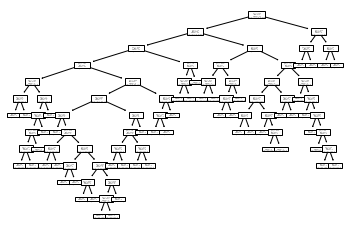

In [44]:
tree.plot_tree(clf)

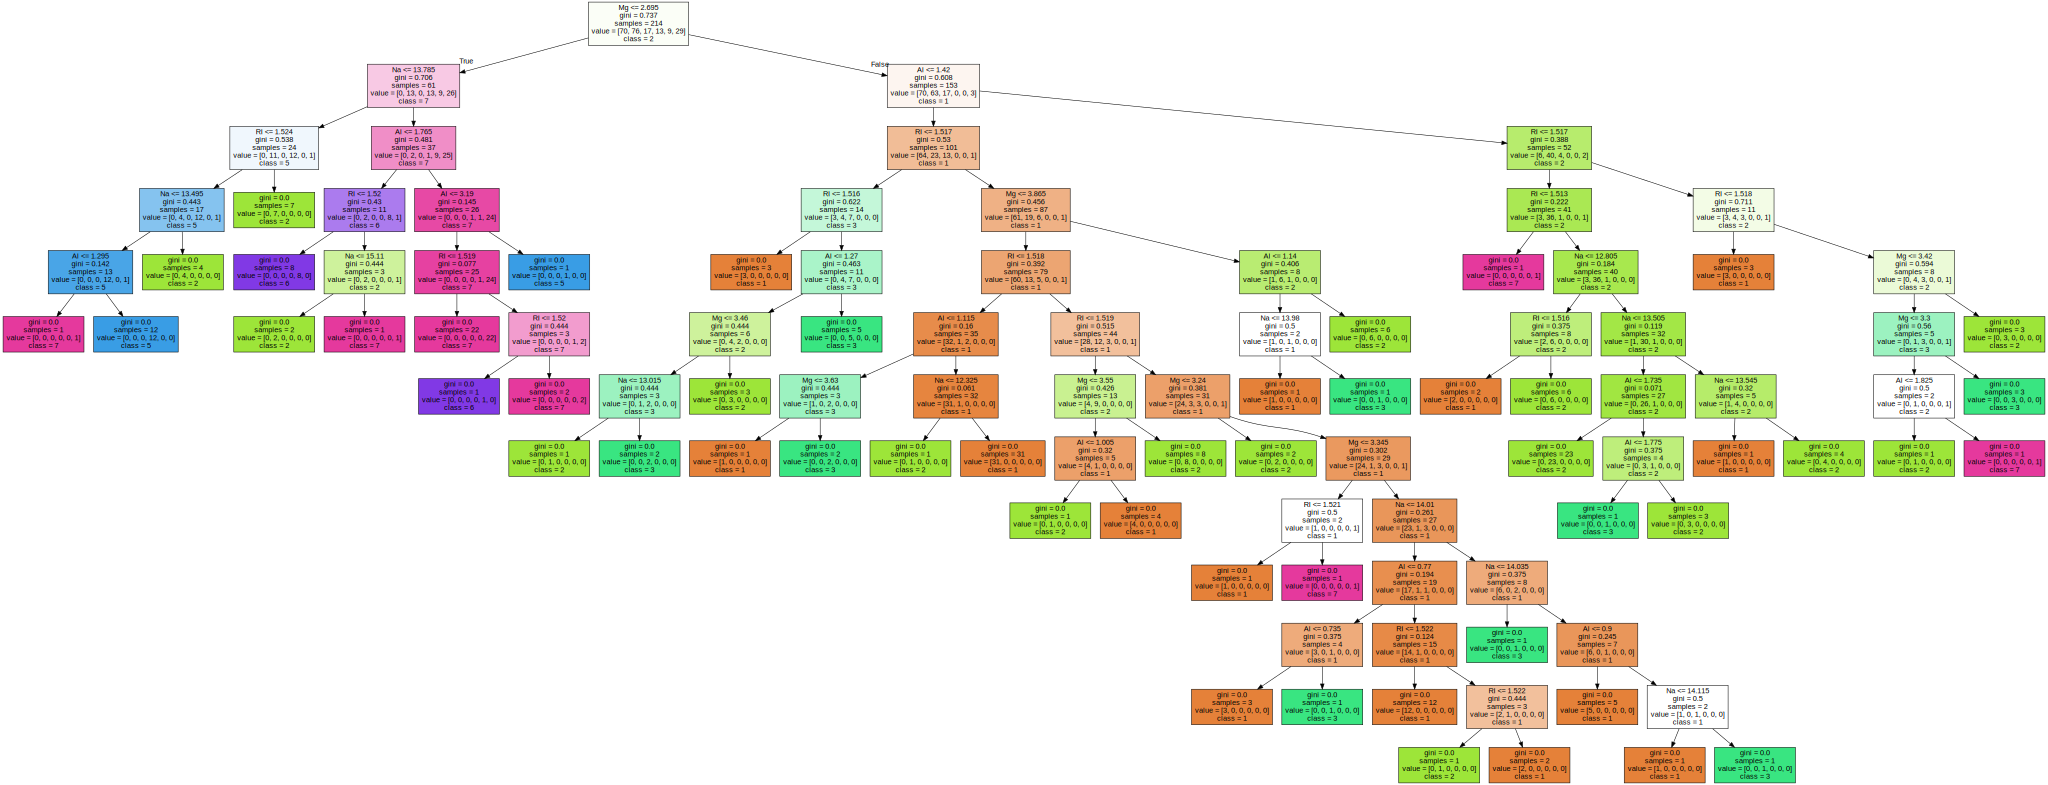

In [46]:
graph=graphviz.Source(data)
graph


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
167,1.51969,12.64,0.00,1.65,73.75,0.38,11.53,0.00,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
140,1.51690,13.33,3.54,1.61,72.54,0.68,8.11,0.00,0.00
180,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.00
196,1.51556,13.87,0.00,2.54,73.23,0.14,9.41,0.81,0.01
...,...,...,...,...,...,...,...,...,...
104,1.52410,13.83,2.90,1.17,71.15,0.08,10.79,0.00,0.00
151,1.52127,14.32,3.90,0.83,71.50,0.00,9.49,0.00,0.00
17,1.52196,14.36,3.85,0.89,71.36,0.15,9.15,0.00,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00


In [48]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [49]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [52]:
search = GridSearchCV(rf, params)
results = search.fit(X_train, y_train)
best = results.best_estimator_

In [53]:
best.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=200)

In [54]:
X = scaler.fit_transform(X)
X

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

In [57]:
glass_ind['Type of glass  prediction 1'] = best.predict(X)

In [58]:
glass_ind

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type of glass prediction,Type of glass prediction 1
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,7,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,7,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,7,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,7,7


In [60]:
glass_ind

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type of glass prediction
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,7


In [ ]:
#Jak widac z wynikow kiedy bierzemy wiecej parametrow dla studiowania dane przewidywane sa lepsze